In [148]:
import pandas as pd
import numpy as np

In [64]:
df=pd.read_excel('data_analysis_store.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='UnitPrice'>

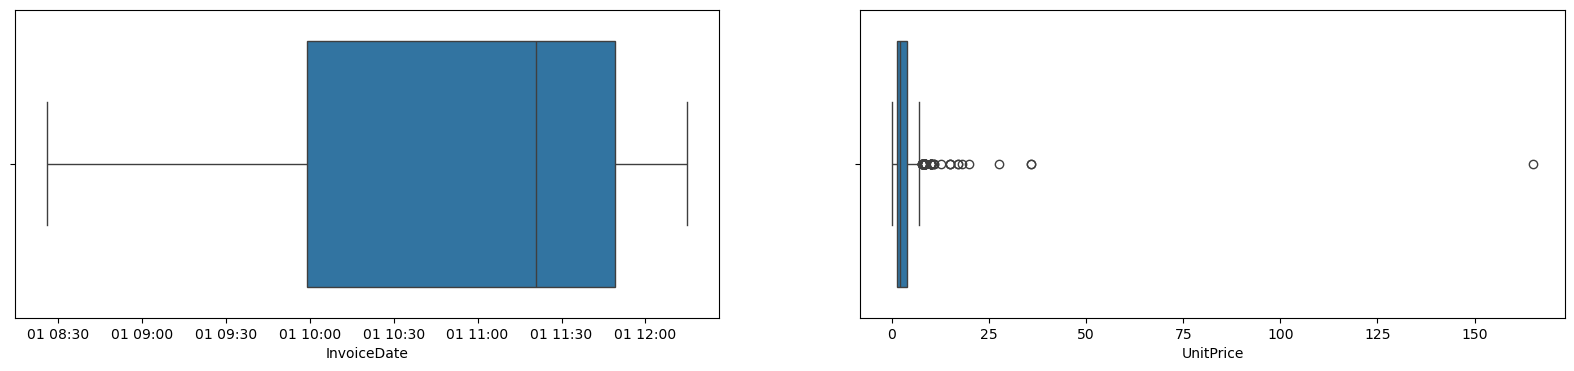

In [90]:
df.dropna(inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(df, x='InvoiceDate', ax=ax[0])
sns.boxplot(df, x='UnitPrice', ax=ax[1])

In [92]:
for column in df.columns:
    if df[column].dtype != 'object': 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
        
df.to_csv("data_without_outliers.csv", index=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<Axes: xlabel='UnitPrice'>

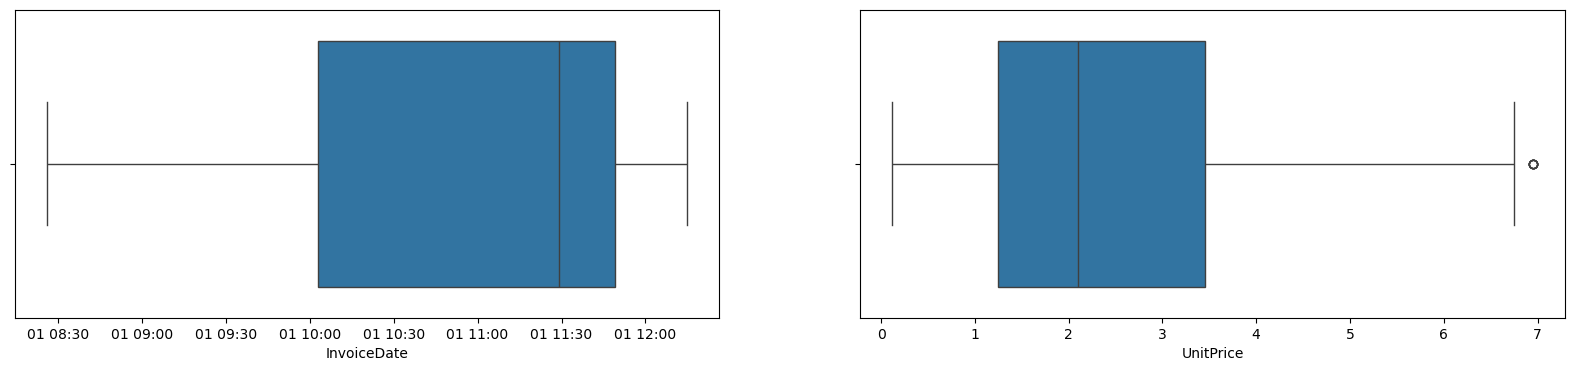

In [94]:
df.dropna(inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(df, x='InvoiceDate', ax=ax[0])
sns.boxplot(df, x='UnitPrice', ax=ax[1])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 0 to 763
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    642 non-null    object        
 1   StockCode    642 non-null    object        
 2   Description  642 non-null    object        
 3   Quantity     642 non-null    int64         
 4   InvoiceDate  642 non-null    datetime64[ns]
 5   UnitPrice    642 non-null    float64       
 6   CustomerID   642 non-null    float64       
 7   Country      642 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 45.1+ KB


In [116]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,642.000000,642,642.000000,642.000000
mean,6.694704,2010-12-01 11:02:29.532710400,2.528364,15843.168224
min,-12.000000,2010-12-01 08:26:00,0.120000,12431.000000
25%,2.000000,2010-12-01 10:03:00,1.250000,14307.000000
50%,6.000000,2010-12-01 11:29:00,2.100000,15983.000000
75%,10.000000,2010-12-01 11:49:00,3.450000,17850.000000
max,25.000000,2010-12-01 12:15:00,6.950000,18085.000000
std,6.339358,NaN,1.577616,1925.664035


In [108]:
df['InvoiceNo'].nunique() #считаем количество произведенных транзакций 

42

In [110]:
df['StockCode'].nunique() #считаем количество товаров

410

In [112]:
df['CustomerID'].nunique() #считаем количество клиентов

29

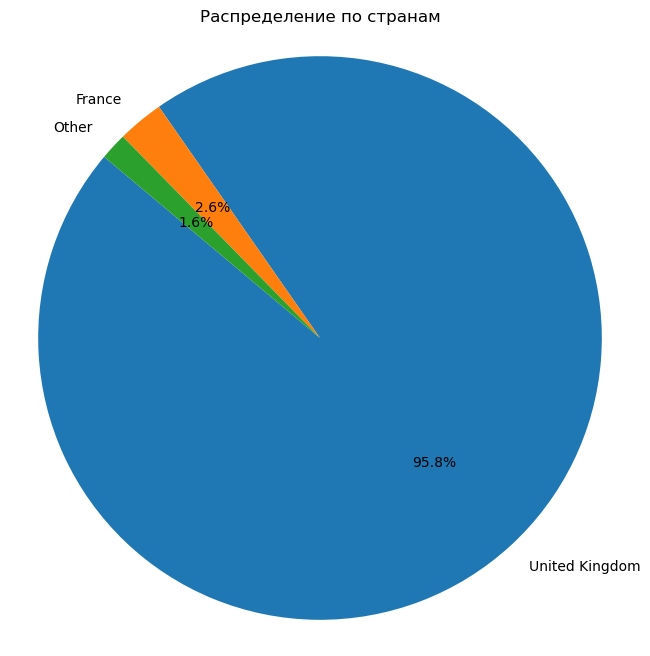

In [102]:
country_counts = df['Country'].value_counts()
top_2_countries = country_counts.nlargest(2).index
other_countries = country_counts[~country_counts.index.isin(top_2_countries)].sum()
data_for_plot = country_counts.nlargest(2)
data_for_plot['Other'] = other_countries

plt.figure(figsize=(8, 8))
plt.pie(data_for_plot, labels=data_for_plot.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по странам')
plt.axis('equal')
plt.show()

## RFM - сегментация

R(Recency) — насколько давно клиент сделал последний заказ. 
F (Frequency) — сколько всего заказов сделал клиент. 
M(Monetary) — сколько денег клиент потрати.


In [120]:
df['InvoiceNo'].str.contains('C').count()

4

In [122]:
df[~df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
758,536446,21651,HANGING GLASS ETCHED TEALIGHT,6,2010-12-01 12:15:00,1.65,15983.0,United Kingdom
759,536446,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,10,2010-12-01 12:15:00,2.95,15983.0,United Kingdom
761,536446,21586,KINGS CHOICE GIANT TUBE MATCHES,4,2010-12-01 12:15:00,2.55,15983.0,United Kingdom
762,536446,21587,COSY HOUR GIANT TUBE MATCHES,4,2010-12-01 12:15:00,2.55,15983.0,United Kingdom


In [124]:
df['Totalprice']=df['UnitPrice']*df['Quantity']

In [126]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [130]:
import datetime as dt
today=dt.datetime(2011,12,12)

In [134]:
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today- date.max()).days, #вычисляем R - количество дней с поледней покупки
    'InvoiceNo': lambda num: num.nunique(), #вычисляем F - сколько всего покупок сделал клиент
    'Totalprice': lambda Totalprice:Totalprice.sum() #вычисляем M - на какую сумму сделал клиентов всего покупок
})

In [136]:
rfm.columns=['Recency','Frequency','Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12431.0,375,1,256.25
12583.0,375,1,737.66
12838.0,375,1,339.79
13047.0,375,3,229.05
13255.0,375,1,56.10
13408.0,375,1,172.68
13448.0,375,2,377.06
13705.0,375,1,153.14
13758.0,375,1,322.65


In [138]:
rfm.describe()

,Recency,Frequency,Monetary
count,29.0,29.000000,29.000000
mean,375.0,1.448276,308.098966
std,0.0,1.702649,256.380772
min,375.0,1.000000,-81.000000
25%,375.0,1.000000,185.300000
50%,375.0,1.000000,256.250000
75%,375.0,1.000000,377.060000
max,375.0,10.000000,1279.840000


In [188]:
#делим на 4 сегмента в каждой группе 
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], 4, labels=False, duplicates='drop') + 1
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 4, labels=False, duplicates='drop') + 1
rfm['RFMScore'] = rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm

,Recency,Frequency,Monetary,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,
12431.0,375,1,256.25,1,2,12
12583.0,375,1,737.66,1,4,14
12838.0,375,1,339.79,1,3,13
13047.0,375,3,229.05,1,2,12
13255.0,375,1,56.10,1,1,11
13408.0,375,1,172.68,1,1,11
13448.0,375,2,377.06,1,3,13
13705.0,375,1,153.14,1,1,11
13758.0,375,1,322.65,1,3,13


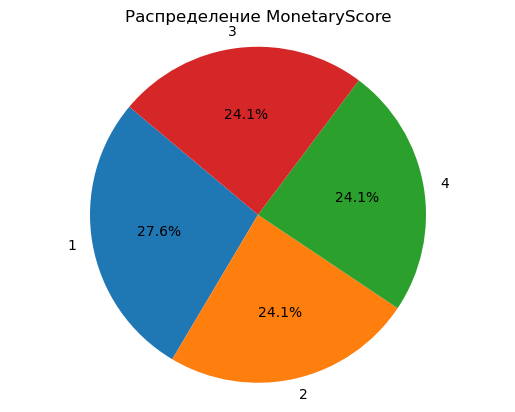

In [202]:
monetary_counts = rfm['MonetaryScore'].value_counts()
labels = monetary_counts.index.astype(str).tolist() 

plt.pie(monetary_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение MonetaryScore')
plt.axis('equal')
plt.show()

In [204]:
def get_segment_data(df, segment):
    segment_data = df[df['RFMScore'] == segment]
    if segment_data.empty:
        print(f"Сегмент '{segment}' не найден.")
        return None
    return segment_data

In [208]:
selected_segment = '12' 
segment_data = get_segment_data(rfm, selected_segment)
segment_data

,Recency,Frequency,Monetary,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,
12431.0,375,1,256.25,1,2,12
13047.0,375,3,229.05,1,2,12
13767.0,375,1,252.20,1,2,12
16098.0,375,1,210.50,1,2,12
16250.0,375,1,210.24,1,2,12
16583.0,375,1,233.45,1,2,12
17908.0,375,1,229.45,1,2,12
